In [1]:
import os
import sys
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)


# Load the NetCDF file
file_path = "results/forecast_horizons_st.nc"
xr_data = xr.open_dataset(file_path)

xr_data

<xarray.Dataset> Size: 199kB
Dimensions:            (t_init: 150, lead_time: 52, var: 3)
Coordinates:
  * t_init             (t_init) <U19 11kB '2022-02-01 00:00:00' ... '2022-03-...
  * lead_time          (lead_time) int64 416B 0 1 2 3 4 5 ... 46 47 48 49 50 51
  * var                (var) <U4 48B 'stl1' 'stl2' 'stl3'
Data variables:
    forecast_horizons  (t_init, lead_time, var) float64 187kB ...

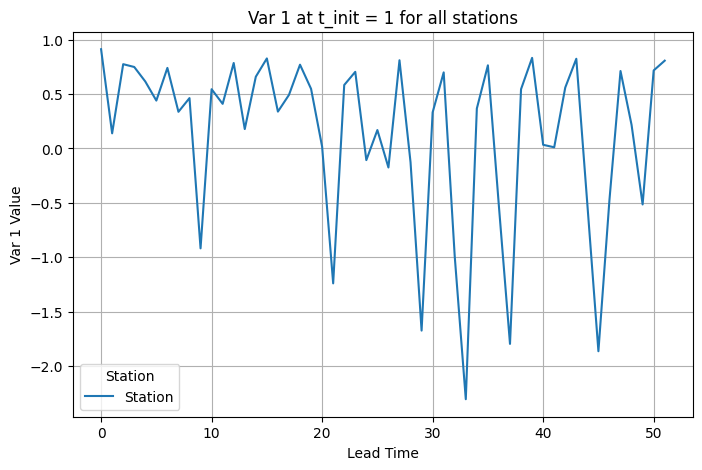

In [2]:
# Extract Var 1 at t_init = 1 for all stations and lead times
var_1_data = xr_data["forecast_horizons"].sel(t_init='2022-02-01 00:00:00', 
                                             var="stl1")

var_1_data

# Plot for all stations over lead times
plt.figure(figsize=(8, 5))
plt.plot(var_1_data.lead_time, var_1_data.data, label=f"Station")

plt.xlabel("Lead Time")
plt.ylabel("Var 1 Value")
plt.title("Var 1 at t_init = 1 for all stations")
plt.legend(title="Station")
plt.grid()
plt.show()


/etc/ecmwf/ssd/ssd1/tmpdirs/pamw.821756.20250226_133110.994/ipykernel_1024535/3080472300.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t_init = pd.date_range(start="2022-02-01", periods=10, freq="M")  # Adjust based on actual data


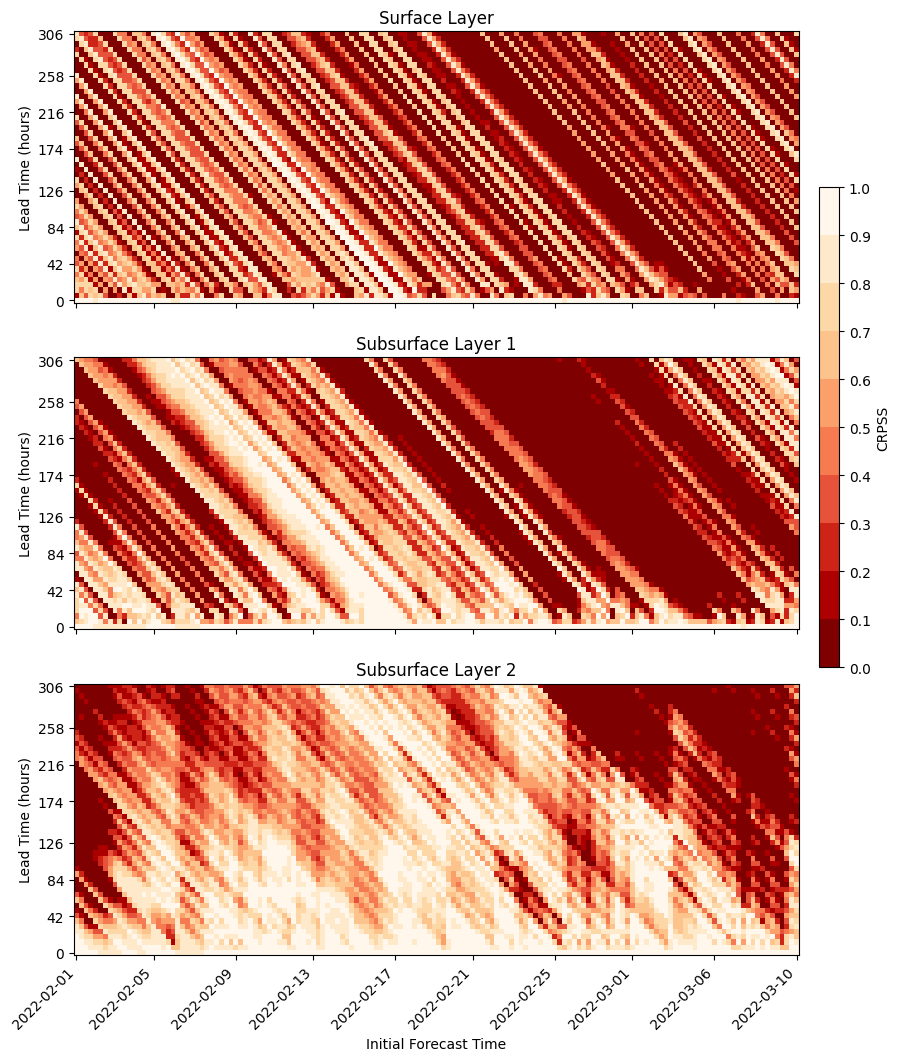

In [3]:
from matplotlib.colors import BoundaryNorm
import pandas as pd

var_1_avg = xr_data["forecast_horizons"].sel(var="stl1")#.mean(dim="station")
var_2_avg = xr_data["forecast_horizons"].sel(var="stl2")#.mean(dim="station")
var_3_avg = xr_data["forecast_horizons"].sel(var="stl3")#.mean(dim="station")

variables = [var_1_avg, var_2_avg, var_3_avg]
titles = ["Surface Layer", "Subsurface Layer 1", "Subsurface Layer 2"]

num_y_ticks = 8  
lead_time_range = np.arange(0, 52 * 6, 6)
y_tick_positions = np.linspace(0, len(lead_time_range) - 1, num_y_ticks, dtype=int)
y_tick_labels = lead_time_range[y_tick_positions]

t_init = pd.date_range(start="2022-02-01", periods=10, freq="M")  # Adjust based on actual data

cmap = plt.get_cmap("OrRd_r")
bounds = np.arange(0.0, 1.1, 0.1)  # Creates intervals from 0.1 to 1.0
norm = BoundaryNorm(bounds, cmap.N)

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i, (var, title) in enumerate(zip(variables, titles)):
    ax = axes[i]
    
    im = ax.imshow(var.T, aspect="auto", cmap=cmap, norm=norm, origin="lower")
    
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Lead Time (hours)")
    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels(y_tick_labels)

num_x_ticks = 10
var_t_init = pd.to_datetime(var.t_init.values)

x_tick_positions = np.linspace(0, len(var_t_init) - 1, num_x_ticks, dtype=int)
x_tick_labels = [var_t_init[i].strftime("%Y-%m-%d") for i in x_tick_positions]

axes[-1].set_xlabel("Initial Forecast Time")
axes[-1].set_xticks(x_tick_positions)
axes[-1].set_xticklabels(x_tick_labels, rotation=45, ha="right")  # Rotate for readability

fig.subplots_adjust(right=0.85)

cbar_ax = fig.add_axes([0.87, 0.35, 0.02, 0.4])  
cbar = fig.colorbar(im, cax=cbar_ax, label="CRPSS", boundaries=bounds, ticks=bounds)
cbar.set_ticks(bounds)
cbar.set_ticklabels([f"{x:.1f}" for x in bounds])

plt.show()